Pour répondre à l'exercice final du notebook, vous devez choisir un jeu de données sur sklearn (par exemple, iris ou california housing dataset, etc.). Vous devez ensuite implémenter (à partir de zéro) au moins un estimateur listé dans l'exercice et détailler votre pré-traitement, ainsi que le fonctionnement du ou des modèles choisis.

# Linear SVM

Dataset extraction : we choose the iris dataset.
This dataset contains different features of 3 iris types.
We will elaborate a classification model to idetify them based on the four features available.

In [1]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

x = iris.data
y = iris.target

## Data vizualization :

data shape (150, 4)
target shape (150,)
variance ratios [0.92461872 0.05306648 0.01710261 0.00521218]
variance captured : 0.977685206318795


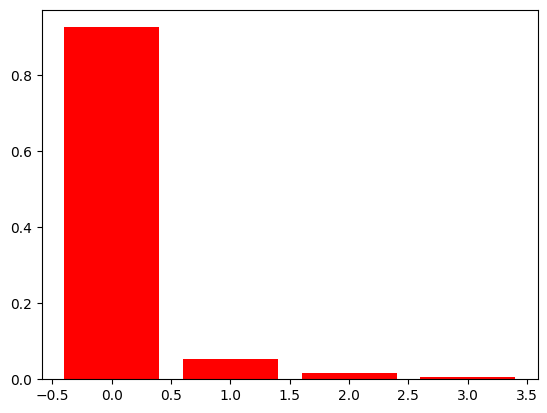

In [2]:
print("data shape",x.shape)
print("target shape",y.shape)

## PCA
from sklearn.decomposition import PCA
iris_pca = PCA()
iris_pca.fit(x)

print("variance ratios",iris_pca.explained_variance_ratio_)
plt.bar(range(x.shape[1]), iris_pca.explained_variance_ratio_, color="r", align="center")

print("variance captured :",np.sum(iris_pca.explained_variance_ratio_[:2]))

We can see that the feature 0 has the largest variance ratio. As this variance ratio exceeds 0.9, we could only use the feature 0 for the classification, however we will also use the feature 1 for more precision.
With those two features alone, we capture almost 98% of the variance. Therefore, we can neglect the two last remaining features.

We can now extract those two features.

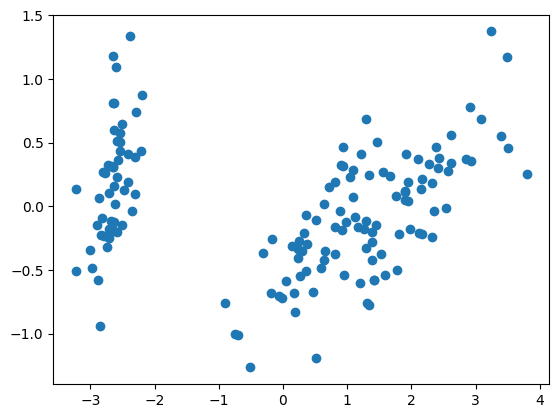

In [3]:
iris_pca = PCA(n_components=2)
iris_pca.fit(x)
X_proj = iris_pca.transform(x)

plt.scatter(X_proj[:,0],X_proj[:,1]);

# We set the dataset we will use in the SVM
X_iris = iris.data[:,:2]
Y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris, Y_iris, test_size=0.2)

By looking at the 2 remaining features, we can see clusters that we can assume correspond to the classes we will classify with our SVM.

## SVM from scratch

In [4]:
import numpy as np

class SVM:

    def __init__(self, lr, lambd, n):
        self.lr = lr
        self.lambd = lambd
        self.n = n
        self.w = None
        self.b = None

    def fit(self, X, y):

        i = X.shape[1]

        #signe des elements de y
        y_ = np.zeros(len(y))
        for idx in range(len(y)):
            if y[idx] <= 0:
                y_[idx] = -1
            else:
                y_[idx] = 1

        # init weights
        self.w = np.zeros(i)
        self.b = 0

        for k in range(self.n):
            for idx in range(len(X)):
                
                if y_[idx] * (np.dot(X[idx], self.w) - self.b) >= 1:
                    self.w = self.w - self.lr * (2 * self.lambd * self.w)
                else:
                    self.w = self.w - self.lr * (2 * self.lambd * self.w - np.dot(X[idx], y_[idx]))
                    self.b = self.b - self.lr * y_[idx]
                    
    def predict(self, X):
        pred = np.dot(X, self.w) - self.b
        return np.round(pred)
 

This SVM function only works to split 2 classes. 

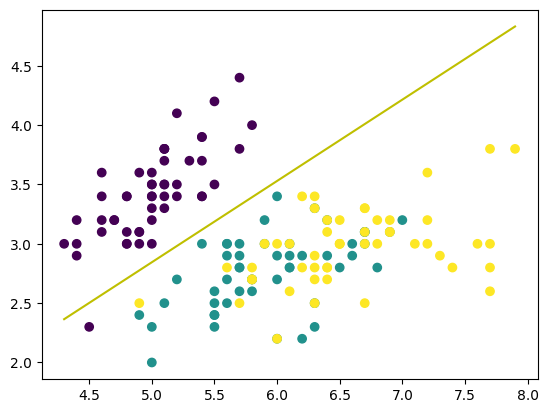

In [5]:
clf = SVM(lr=0.001, lambd=0.01, n=1000)
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], marker="o", c=y)

x0_1 = np.amin(X_iris[:, 0])
x0_2 = np.amax(X_iris[:, 0])

x1_1 = (-clf.w[0] * x0_1 + clf.b) / clf.w[1]
x1_2 = (-clf.w[0] * x0_2 + clf.b) / clf.w[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y")

x1_min = np.amin(X_iris[:, 1])
x1_max = np.amax(X_iris[:, 1])

plt.show()

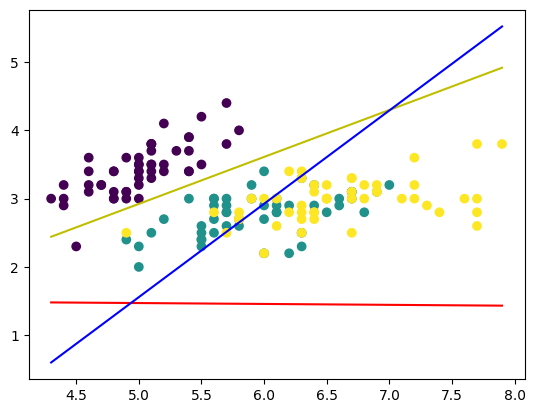

In [6]:
#Dataset class 0

Y_iris0 = np.zeros(len(Y_iris))

for idx in range(len(Y_iris)):
    if Y_iris[idx] == 0:
        Y_iris0[idx] = 1
    else :
        Y_iris0[idx] = -1
        
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_iris, Y_iris0, test_size=0.2)

clf0 = SVM(lr=0.001, lambd=0.01, n=1000)
clf0.fit(X_train0, y_train0)
predictions0 = clf.predict(X_test0)


##Dataset class 1

Y_iris1 = np.zeros(len(Y_iris))

for idx in range(len(Y_iris)):
    if Y_iris[idx] == 1:
        Y_iris1[idx] = 1
    else :
        Y_iris1[idx] = -1
        
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_iris, Y_iris1, test_size=0.2)

clf1 = SVM(lr=0.001, lambd=0.01, n=1000)
clf1.fit(X_train1, y_train1)
predictions1 = clf.predict(X_test1)


##Dataset class 2

Y_iris2 = np.zeros(len(Y_iris))

for idx in range(len(Y_iris)):
    if Y_iris[idx] == 2:
        Y_iris2[idx] = 1
    else :
        Y_iris2[idx] = -1
        
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_iris, Y_iris2, test_size=0.2)

clf2 = SVM(lr=0.001, lambd=0.01, n=1000)
clf2.fit(X_train2, y_train2)
predictions2 = clf.predict(X_test2)

##Affichage
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], marker="o", c=y)

x0_1 = np.amin(X_iris[:, 0])
x0_2 = np.amax(X_iris[:, 0])

x1_10 = (-clf0.w[0] * x0_1 + clf0.b) / clf0.w[1]
x1_20 = (-clf0.w[0] * x0_2 + clf0.b) / clf0.w[1]
x1_11 = (-clf1.w[0] * x0_1 + clf1.b) / clf1.w[1]
x1_21 = (-clf1.w[0] * x0_2 + clf1.b) / clf1.w[1]
x1_12 = (-clf2.w[0] * x0_1 + clf2.b) / clf2.w[1]
x1_22 = (-clf2.w[0] * x0_2 + clf2.b) / clf2.w[1]

ax.plot([x0_1, x0_2], [x1_10, x1_20], "y")
ax.plot([x0_1, x0_2], [x1_11, x1_21], "r")
ax.plot([x0_1, x0_2], [x1_12, x1_22], "b")

x1_min = np.amin(X_iris[:, 1])
x1_max = np.amax(X_iris[:, 1])

plt.show()

## SVM Classifier

We will now code the SVM classifier that will categorize the 3 classes of iris.

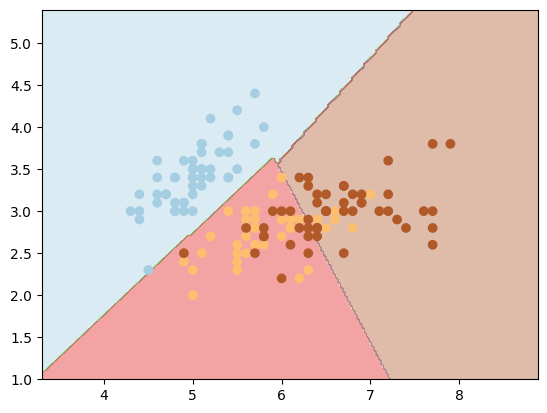

In [7]:
classifier = SVC(kernel = 'linear',C = 1)
classifier.fit(X_iris, Y_iris)

#####test######
X_min, X_max = X_iris[:,0].min()-1, X_iris[:,0].max()+1
Y_min, Y_max = X_iris[:,1].min()-1, X_iris[:,1].max()+1

h = (X_max/X_min)/100
XX,YY = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

plt.subplot(1,1,1)
Z = classifier.predict(np.c_[XX.ravel(),YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX,YY,Z, cmap=plt.cm.Paired, alpha=0.4)

plt.scatter(X_iris[:,0],X_iris[:,1],c = y, cmap = plt.cm.Paired)

plt.show()

By looking at the results of the classification, we can see that one of the classes is clearly delimited, the SVM can easily separate it from the rest of the samples. For the two other classes, however, we can see that they are very intermingled. Separating them doesn't seem to be possible at a first glance.

## Evaluation 

In [8]:
classifier.score(X = X_iris,y =Y_iris)

0.82

The linear SVM gives a reasonnable classification score of 82%. We will test different non linear SVM to find if we can get a better classification.

## Non linear SVM

### Radial Basis Function

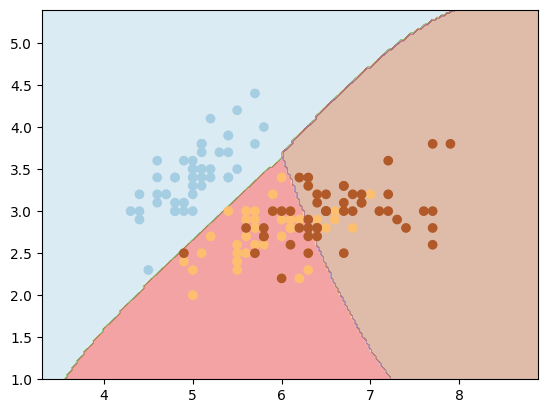

In [9]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_iris, Y_iris)
#####test######
X_min, X_max = X_iris[:,0].min()-1, X_iris[:,0].max()+1
Y_min, Y_max = X_iris[:,1].min()-1, X_iris[:,1].max()+1

h = (X_max/X_min)/100
XX,YY = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

plt.subplot(1,1,1)
Z = classifier.predict(np.c_[XX.ravel(),YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX,YY,Z, cmap=plt.cm.Paired, alpha=0.4)

plt.scatter(X_iris[:,0],X_iris[:,1],c = y, cmap = plt.cm.Paired)

plt.show()

## Evaluation 

In [10]:
classifier.score(X = X_iris,y =Y_iris)

0.82

### Sigmoid

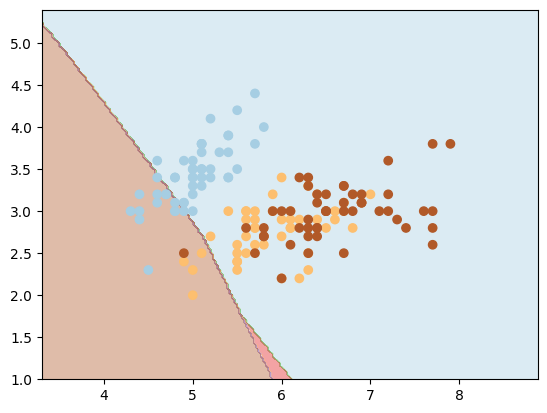

In [11]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(X_iris, Y_iris)
#####test######
X_min, X_max = X_iris[:,0].min()-1, X_iris[:,0].max()+1
Y_min, Y_max = X_iris[:,1].min()-1, X_iris[:,1].max()+1

h = (X_max/X_min)/100
XX,YY = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

plt.subplot(1,1,1)
Z = classifier.predict(np.c_[XX.ravel(),YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX,YY,Z, cmap=plt.cm.Paired, alpha=0.4)

plt.scatter(X_iris[:,0],X_iris[:,1],c = y, cmap = plt.cm.Paired)

plt.show()

In [12]:
classifier.score(X = X_iris,y =Y_iris)

0.24666666666666667

### Polynomial Kernel

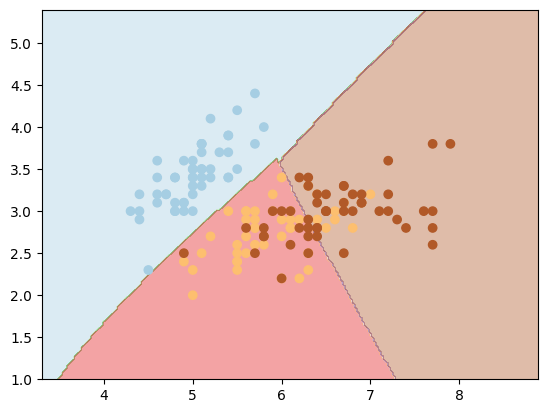

In [13]:
classifier = SVC(kernel = 'poly', degree = 2)   #9
classifier.fit(X_iris, Y_iris)
#####test######
X_min, X_max = X_iris[:,0].min()-1, X_iris[:,0].max()+1
Y_min, Y_max = X_iris[:,1].min()-1, X_iris[:,1].max()+1

h = (X_max/X_min)/100
XX,YY = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))

plt.subplot(1,1,1)
Z = classifier.predict(np.c_[XX.ravel(),YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX,YY,Z, cmap=plt.cm.Paired, alpha=0.4)

plt.scatter(X_iris[:,0],X_iris[:,1],c = y, cmap = plt.cm.Paired)

plt.show()

In [14]:
classifier.score(X = X_iris,y =Y_iris)

0.82

Accuracy: 0.0


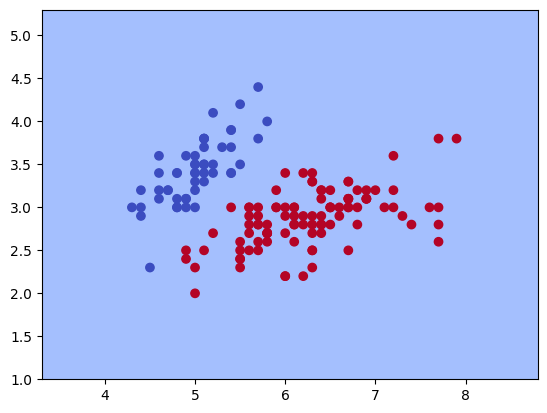

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class SVM:
    def __init__(self, C=1, max_iter=100):
        self.C = C
        self.max_iter = max_iter
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.X = X
        self.y = y
        self.alphas = np.zeros(n_samples)
        self.b = 0
        K = np.dot(X, X.T)
        for iteration in range(self.max_iter):
            num_changed_alphas = 0
            for i in range(n_samples):
                Ei = self._E(i)
                if (self.y[i] * Ei < -1e-5 and self.alphas[i] < self.C) or \
                   (self.y[i] * Ei > 1e-5 and self.alphas[i] > 0):
                    j = self._select_j(i, n_samples)
                    Ej = self._E(j)
                    alpha_i_old, alpha_j_old = self.alphas[i].copy(), self.alphas[j].copy()
                    if self.y[i] != self.y[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[j] + self.alphas[i] - self.C)
                        H = min(self.C, self.alphas[j] + self.alphas[i])
                    if L == H:
                        continue
                    eta = K[i, i] + K[j, j] - 2 * K[i, j]
                    if eta <= 0:
                        continue
                    self.alphas[j] += self.y[j] * (Ei - Ej) / eta
                    self.alphas[j] = max(L, min(H, self.alphas[j]))
                    if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                        continue
                    self.alphas[i] += self.y[i] * self.y[j] * (alpha_j_old - self.alphas[j])
                    b1 = self.b - Ei - self.y[i] * (self.alphas[i] - alpha_i_old) * K[i, i] - self.y[j] * (self.alphas[j] - alpha_j_old) * K[i, j]
                    b2 = self.b - Ej - self.y[i] * (self.alphas[i] - alpha_i_old) * K[i, j] - self.y[j] * (self.alphas[j] - alpha_j_old) * K[j, j] 
                    b = 0
                    for i in range(n_samples):
                        if self.alphas[i] > 0:
                            b += self.y[i] - np.dot(self.alphas * self.y, K[:, i])
                    self.b = b / np.sum(self.alphas > 0)

            if num_changed_alphas == 0:
                break

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            result = np.dot(self.alphas * self.y, np.dot(self.X, x)) + self.b
            y_pred.append(np.sign(result))
        return np.array(y_pred)

    def _E(self, i):
        return np.dot(self.alphas * self.y, np.dot(self.X, self.X[i])) + self.b - self.y[i]

    def _select_j(self, i, n_samples):
        j = i
        Ei = self._E(i)
        max_delta_E = 0
        for k in range(n_samples):
            if k == i:
                continue
            Ek = self._E(k)
            delta_E = abs(Ei - Ek)
            if delta_E > max_delta_E:
                max_delta_E = delta_E
                j = k
        return j
    
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert y to binary labels
y[y != 0] = 1

# Split the data into training and testing sets
training_samples = 120
X_train, y_train = X[:training_samples], y[:training_samples]
X_test, y_test = X[training_samples:], y[training_samples:]

# Train the SVM model
svm = SVM(C=10)
svm.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

def plot_decision_boundary(X, y, svm):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# use only two features for visualization purposes
X = iris.data[:, :2]
y = iris.target

# train the model using only two features
svm = SVM()
svm.fit(X, y)

# plot the decision boundary
plot_decision_boundary(X, y, svm)


